# fec12 


**fec12** contains data from the [Federal Election Commission
(FEC)](https://www.fec.gov/) website pertaining to candidates,
committees, results, contributions from committees and individuals, and
other financial [data for the United States 2011-2012 election
cycle](https://www.fec.gov/data/browse-data/?tab=bulk-data).
Additionally, for the datasets that are included as samples, the package
includes functions that import the full versions.

## Datasets Included

### Full Datasets

  - `candidates`: candidates registered with the FEC during the
    2011-2012 election cycle
  - `committees`: committees registered with the FEC during the
    2011-2012 election cycle
  - `campaigns`: the house/senate current campaigns
  - `results_house`: the house results of the 2012 general presidential
    election
  - `results_senate`: the senate results of the 2012 general
    presidential election
  - `results_president`: the final results of the 2012 general
    presidential election
  - `pac`: Political Action Committee (PAC) and party summary financial
    information

### Sample Datasets (with 1000 random rows each)

  - `individuals`: individual contributions to candidates/committees
    during the 2012 general presidential election
  - `contributions`: candidates and their contributions from committees
    during the 2012 general election
  - `expenditures`: the operating expenditures
  - `transactions`: transactions between committees

In [1]:
import pandas as pd
import numpy as np

# Extracting data

In [2]:
fec= pd.read_csv("P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [3]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


A sample record in the DataFrame looks like this:

In [4]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

# Transforming the data

It can be seen that there are no political party affiliations in the data, so this would be useful to add. You can get a list of all the unique political candidates using unique:

In [5]:
unique_cands = fec["cand_nm"].unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [6]:
unique_cands[2]

'Obama, Barack'

One way to indicate party affiliation is using a dictionary:

In [7]:
parties={"Bachman, Michelle": "Republican",
        "Cain, Herman": "Republican",
        "Gingrich, Newt": "Republican",
        "Huntman, Jon": "Republican",
        "McCotter, Thaddeus G": "Republican",
        "Obama, Barack": "Democrat",
        "Paul, Ron": "Republican",
        "Pawlenty, Timothy": "Republican",
        "Perry, Rick": "Republican",
        "Roemer, Charles E. 'Buddy' III": "Republican",
        "Romrey, Mitt": "Republican",
        "Santorum, Rick": "Republican"}

In [8]:
parties.keys()

dict_keys(['Bachman, Michelle', 'Cain, Herman', 'Gingrich, Newt', 'Huntman, Jon', 'McCotter, Thaddeus G', 'Obama, Barack', 'Paul, Ron', 'Pawlenty, Timothy', 'Perry, Rick', "Roemer, Charles E. 'Buddy' III", 'Romrey, Mitt', 'Santorum, Rick'])

In [9]:
pd.Series(parties, index=['Bachman, Michelle', 'Cain, Herman', 'Gingrich, Newt', 'Huntman, Jon', 'McCotter, Thaddeus G', 'Obama, Barack', 'Paul, Ron', 'Pawlenty, Timothy', 'Perry, Rick', "Roemer, Charles E. 'Buddy' III", 'Romrey, Mitt', 'Santorum, Rick'])

Bachman, Michelle                 Republican
Cain, Herman                      Republican
Gingrich, Newt                    Republican
Huntman, Jon                      Republican
McCotter, Thaddeus G              Republican
Obama, Barack                       Democrat
Paul, Ron                         Republican
Pawlenty, Timothy                 Republican
Perry, Rick                       Republican
Roemer, Charles E. 'Buddy' III    Republican
Romrey, Mitt                      Republican
Santorum, Rick                    Republican
dtype: object

Now, using this mapping and the map method on Series objects, you can compute an array of political parties from the candidate names:

In [10]:
fec["cand_nm"][123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [11]:
#map()

In [12]:
fec["cand_nm"][123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [13]:
#add it as a column
fec["party"]=fec["cand_nm"].map(parties)
fec["party"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
              ...    
1001726    Republican
1001727    Republican
1001728    Republican
1001729    Republican
1001730    Republican
Name: party, Length: 1001731, dtype: object

In [14]:
fec["party"].value_counts()

Democrat      593746
Republican    282226
Name: party, dtype: int64

# Cleaning the data

A couple of data preparation points. First, this data includes both contributions and refunds (negative contribution amount):

In [15]:
(fec["contb_receipt_amt"]>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

To simplify the analysis, The dataset'll be restricted to positive contributions:

In [16]:
fec= fec[fec["contb_receipt_amt"] > 0]
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,NaN
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,NaN
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,NaN
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,NaN
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


Donation Statistics by Occupation and Employer

Donations by occupation is another oft-studied statistic. For example, attorneys tend to donate more money to Democrats, while business executives tend to donate more to Republicans. You have no reason to believe me; you can see for yourself in the data. First, the total number of donations by occupation can be computed with value_counts:

In [17]:
fec["contbr_occupation"].value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

It can be noticed by looking at the occupations that many refer to the same basic job type, or there are several variants of the same thing. The following code snippet illustrates a technique for cleaning up a few of them by mapping from one occupation to another; note the “trick” of using dict.get to allow occupations with no mapping to “pass through”:

In [41]:
occ_mapping= {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED" : "NOT PROVIDED",
    "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
    "C.E.O.": "CEO",
    "REQUESTED": "NOT PROVIDED",
    "(RETIRED)": "RETIRED",
    "SELF-EMPLOYED" : "SELF EMPLOYED",
    "'SELF'": "SELF",
    "(SELF)": "SELF",
    "-SELF-": "SELF",
    "NONE": "NOT PROVIDED"
}

def get_occ(x):
    #if not mapping provided, return x
    return occ_mapping.get(x,x)
fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)
fec["contbr_occupation"].value_counts()[:10]

RETIRED         233991
NOT PROVIDED     61918
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [19]:
fec["contbr_employer"].value_counts()[:10]

RETIRED                                   206675
SELF-EMPLOYED                              94505
NOT EMPLOYED                               45877
INFORMATION REQUESTED                      36135
SELF                                       24385
INFORMATION REQUESTED PER BEST EFFORTS     22260
NONE                                       19929
HOMEMAKER                                  18269
SELF EMPLOYED                               6274
REQUESTED                                   4233
Name: contbr_employer, dtype: int64

In [20]:
emp_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED" : "NOT PROVIDED",
    "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
    "C.E.O.": "CEO",
    "REQUESTED": "NOT PROVIDED",
    "(RETIRED)": "RETIRED",
    "SELF-EMPLOYED" : "SELF EMPLOYED",
    "'SELF'": "SELF EMPLOYED",
    "(SELF)": "SELF EMPLOYED",
    "-SELF-": "SELF EMPLOYED",
    "SELF": "SELF EMPLOYED",
    "NONE": "NOT PROVIDED"
}

def get_emp(x):
    #if no mapping prrovided, return x
    return emp_mapping.get(x,x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [21]:
fec["contbr_employer"].value_counts()[:10]

RETIRED              206681
SELF EMPLOYED        125169
NOT PROVIDED          83474
NOT EMPLOYED          45877
HOMEMAKER             18269
UNEMPLOYED             2514
US ARMY                1817
STUDENT                1786
OBAMA FOR AMERICA      1741
IBM                    1428
Name: contbr_employer, dtype: int64

Now, you can use pivot_table to aggregate the data by party and occupation, then filter down to the subset that donated at least $2 million overall:

# Transforming the data

In [22]:
#pivot_table()

In [23]:
by_occupation= fec.pivot_table("contb_receipt_amt", index="contbr_employer", columns="party", aggfunc="sum")
by_occupation.head(50)

party,Democrat,Republican
contbr_employer,,
DUKE PRIMARY CARE,250.0,NaN
FORSYTHE SOLUTIONS GROUP,90.0,NaN
NANCY EDMAN INTERIORS,500.0,NaN
NORTHERN ILLINOIS CONFERENCE UNITED M,125.0,NaN
#1 TOUCHDOWN CITY PREOWNED AUTOS LLC,NaN,100.00
(ATTENDING) INDIANA UNIVERSITY,NaN,20.12
(CRMA) CHARLES RIVER MEDICAL ASSOCIATE,500.0,NaN
(FORMER) IMF,429.0,NaN
(FORMERLY SELF EMPLOYED),NaN,100.60


In [24]:
over_2mm= by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_employer,,
HOMEMAKER,2605408.54,4106074.24
NOT EMPLOYED,8586308.70,46648.73
NOT PROVIDED,5089435.37,13297665.23
RETIRED,22694358.85,7166943.30
SELF EMPLOYED,18626982.16,11263038.45


# Visualizing the data

Total donations by party for top occupations

<AxesSubplot:ylabel='contbr_employer'>

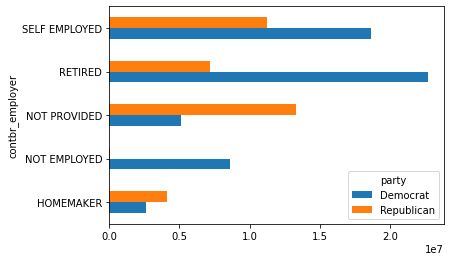

In [25]:
#It can be easier to look at this data graphically as a bar plot ("barh" means horizontal bar plot)
over_2mm.plot(kind="barh")

# Transforming the data

You might be interested in the top donor occupations or top companies that donated to their candidates. To do this, you can group by candidate name and use a variant of the top method used before in this project:

Since Barack Obama and Mitt Romney were the main two candidates, It'll be also prepared a subset that just has contributions to their campaigns:

In [26]:
#isin([])

In [27]:
fec_mrbo= fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
fec_mrbo              

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,NaN
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,NaN
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,NaN
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,NaN
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


# Visualizing the data

In [28]:
def get_top_amounts(group, key, n=5):
    totals=group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [29]:
grouped= fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts,"contbr_occupation", n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4871001.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [30]:
grouped.apply(get_top_amounts,"contbr_employer", n=7)

cand_nm        contbr_employer
Obama, Barack  RETIRED            22694358.85
               SELF EMPLOYED      18626982.16
               NOT EMPLOYED        8586308.70
               NOT PROVIDED        5089435.37
               HOMEMAKER           2605408.54
               STUDENT              318831.45
               VOLUNTEER            257104.00
Romney, Mitt   NOT PROVIDED       12067785.24
               RETIRED            11506225.71
               HOMEMAKER           8147196.22
               SELF EMPLOYED       7414115.22
               STUDENT              496490.94
               CREDIT SUISSE        281150.00
               MORGAN STANLEY       267266.00
Name: contb_receipt_amt, dtype: float64

# Transforming the data

Bucketing Donation Amounts

A useful way to analyze this data is to use the cut function to discretize the contributor amounts into buckets by contribution size:

In [31]:
#cut()

In [32]:
bins= np.array([0,1,10,100,1000,10000,100_000,1_000_000,10_000_000])
labels=pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

We can then group the data for Obama and Romney by name and bin label to get a histogram by donation size:

In [33]:
grouped= fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


This data shows that Obama received a significantly larger number of small donations than Romney. You can also sum the contribution amounts and normalize within buckets to visualize the percentage of total donations of each size by candidate

In [34]:
bucket_sums= grouped["contb_receipt_amt"].sum().unstack(level=0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [35]:
#div()

In [36]:
normed_sums=bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


# Visualizing the data

Percentage of total donations received by candidates for each donation size

<AxesSubplot:ylabel='contb_receipt_amt'>

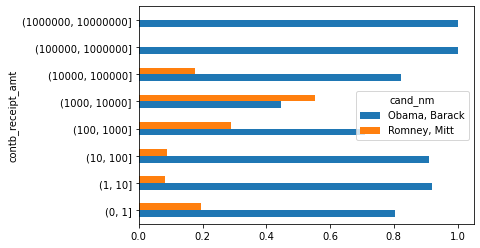

In [37]:
normed_sums.plot(kind="barh")

# Transforming the data

Donation Statistics by State

Aggregating the data by candidate and state:

In [38]:
grouped= fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals=grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals=totals[totals.sum(axis="columns")>10000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
AP,37130.50,1655.00
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12


Relative percentage of total donations by state for each candidate:

# Visualizing the data

In [39]:
#div()

In [40]:
percent=totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997612,0.002388
AE,0.883257,0.116743
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
